#### This notebook is to perform Multiple Linear Regression 

In [1]:
options(warns=-1)

In [2]:
data = read.csv('../data/mros_mapping_alpha.txt', stringsAsFactors=FALSE, sep='\t')
data$Age_78 = data$Age - min(data$Age)

In [3]:
head(data)

X.SampleID,BarcodeSequence,LinkerPrimerSequence,Experiment_Design_Description,Library_Construction_Protocol,Linker,Platform,Center_Name,Center_Project,Instrument_Model,⋯,Antihistamine,Laxative,MIDATA,Rstarch_total,Rstarches_c,alpha_pd,observed_otus,shannon,pielou_e,Age_78
BI0023,TCTGGTGACATT,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D study,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,⋯,0:No,0:No,1: Yes,3.066569,0,27.77117,302,5.727116,0.6951729,5
BI0056,CAAGCATGCCTA,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D study,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,⋯,0:No,0:No,1: Yes,3.038136,0,17.93266,173,3.888281,0.5229960,3
BI0131,CTATTTGCGACA,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D study,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,⋯,0:No,0:No,1: Yes,2.840599,0,21.45366,223,4.050730,0.5192645,5
BI0153,ATCGGCGTTACA,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D study,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,⋯,0:No,0:No,1: Yes,4.106798,0,18.46968,223,4.894253,0.6273959,1
BI0215,CCTCTCGTGATC,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D study,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,⋯,0:No,0:No,1: Yes,0.971114,0,20.04983,222,5.295055,0.6793396,3
BI0353,TGCCATCTGAAT,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D study,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,⋯,0:No,0:No,1: Yes,4.813568,0,13.75183,155,4.213016,0.5790192,2


In [4]:
# standardize Vitamin D measurements
data$OHV1D3 = (data$OHV1D3 - mean(data$OHV1D3, na.rm=TRUE)) / sd(data$OHV1D3, na.rm=TRUE)
data$OHVD3 = (data$OHVD3 - mean(data$OHVD3, na.rm=TRUE)) / sd(data$OHVD3, na.rm=TRUE)
data$OHV24D3 = (data$OHV24D3 - mean(data$OHV24D3, na.rm=TRUE)) / sd(data$OHV24D3, na.rm=TRUE)
data$ratio_activation = (data$ratio_activation- mean(data$ratio_activation, na.rm=TRUE)) / sd(data$ratio_activation, na.rm=TRUE)
data$ratio_catabolism = (data$ratio_catabolism- mean(data$ratio_catabolism, na.rm=TRUE)) / sd(data$ratio_catabolism, na.rm=TRUE)

In [5]:
# convert character to factors
data$GIERACE = factor(data$GIERACE)
data$SITE = factor(data$SITE)
data$M1ANTIB = factor(data$M1ANTIB)
data$M1ADEPR = factor(data$M1ADEPR)
data$TUDRAMT = factor(data$TUDRAMT)
data$TURSMOKE = factor(data$TURSMOKE)
data$M1VITMND = factor(data$M1VITMND)
data$M1PROBI = factor(data$M1PROBI)
data$OHSEAS = factor(data$OHSEAS)
data$VDstatus = factor(data$VDstatus)
data$QLCOMP = factor(data$QLCOMP)
data$M1STATIN = factor(data$M1STATIN)
data$Antihistamine = factor(data$Antihistamine)
data$Laxative = factor(data$Laxative)

# combine missing values in VDstatus into one group
data$VDstatus[data$VDstatus==''] <- 'Missing:Not collected '

# change levels
data$SITE = relevel(data$SITE, ref='San Diego')
data$TUDRAMT = relevel(data$TUDRAMT, ref='0:None drinker')
data$M1VITMND = relevel(data$M1VITMND, ref='1: Yes')
data$OHSEAS = relevel(data$OHSEAS, ref='3:SUMMER')
data$VDstatus = relevel(data$VDstatus, ref='sufficiency')
data$QLCOMP = relevel(data$QLCOMP, ref='1:GOOD/EXCELLENT')

In [6]:
colnames(data)

[1] "X.SampleID"                    "BarcodeSequence"              
 [3] "LinkerPrimerSequence"          "Experiment_Design_Description"
 [5] "Library_Construction_Protocol" "Linker"                       
 [7] "Platform"                      "Center_Name"                  
 [9] "Center_Project"                "Instrument_Model"             
[11] "Title"                         "Anonymized_Name"              
[13] "Scientific_Name"               "Taxon_ID"                     
[15] "Sample_Type"                   "Geo_Loc_Name"                 
[17] "Elevation"                     "Env_Biome"                    
[19] "Env_Feature"                   "Env_Material"                 
[21] "Env_Package"                   "Latitude"                     
[23] "Longitude"                     "Collection_Timestamp"         
[25] "DNA_Extracted"                 "Physical_Specimen_Location"   
[27] "Physical_Specimen_Remaining"   "Age"                          
[29] "Age_Units"                     "Host_Subject_ID"              
[31] "Host_Taxid"                    "Host_Scientific_Name"         
[33] "Host_Common_Name"              "Life_Stage"                   
[35] "Sex"                           "Height"                       
[37] "Height_Units"                  "Weight"                       
[39] "Weight_Units"                  "BMI"                          
[41] "Body_Habitat"                  "Body_Site"                    
[43] "Body_Product"                  "GIERACE"                      
[45] "SITE"                          "TUDRAMT"                      
[47] "PASCORE"                       "TURSMOKE"                     
[49] "DTVITD"                        "M1ADEPR"                      
[51] "M1VITMND"                      "M1ANTIB"                      
[53] "M1PROBI"                       "OHV1D3"                       
[55] "OHV24D3"                       "OHVD3"                        
[57] "OHVD2"                         "OHV1D2"                       
[59] "OHV1D2CT"                      "OHVD2CT"                      
[61] "OHVDTOT"                       "OHV1DTOT"                     
[63] "OHSEAS"                        "VDstatus"                     
[65] "Description"                   "ratio_activation"             
[67] "ratio_catabolism"              "QLCOMP"                       
[69] "M1STATIN"                      "Antihistamine"                
[71] "Laxative"                      "MIDATA"                       
[73] "Rstarch_total"                 "Rstarches_c"                  
[75] "alpha_pd"                      "observed_otus"                
[77] "shannon"                       "pielou_e"                     
[79] "Age_78"

In [7]:
summary(data)

  X.SampleID        BarcodeSequence    LinkerPrimerSequence
 Length:599         Length:599         Length:599          
 Class :character   Class :character   Class :character    
 Mode  :character   Mode  :character   Mode  :character    
                                                           
                                                           
                                                           
                                                           
 Experiment_Design_Description Library_Construction_Protocol    Linker         
 Length:599                    Length:599                    Length:599        
 Class :character              Class :character              Class :character  
 Mode  :character              Mode  :character              Mode  :character  
                                                                               
                                                                               
                                        

In [8]:
attach(data)

## stepwise backwards selection, with p-value threshold 0.2

In [9]:
library(car)
Anova(lm(alpha_pd ~ Age_78 + BMI + GIERACE + SITE + TUDRAMT + PASCORE + TURSMOKE + 
      DTVITD + M1ADEPR + M1VITMND + M1ANTIB + M1PROBI + OHSEAS + 
      QLCOMP + M1STATIN + Antihistamine + Laxative + Rstarch_total))

Loading required package: carData


,Sum Sq,Df,F value,Pr(>F)
Age_78,9.236440e+01,1,2.517114e+00,0.1131933153
BMI,9.045723e+01,1,2.465140e+00,0.1169745089
GIERACE,5.152570e+02,4,3.510445e+00,0.0076541321
SITE,4.460401e+02,5,2.431096e+00,0.0340359307
TUDRAMT,3.456342e+02,6,1.569870e+00,0.1536526467
PASCORE,1.795250e+02,1,4.892416e+00,0.0273866833
TURSMOKE,7.761676e+01,3,7.050706e-01,0.5492743318
DTVITD,9.553837e-01,1,2.603611e-02,0.8718716246
M1ADEPR,2.554304e+02,1,6.960988e+00,0.0085674423
M1VITMND,2.186115e+01,1,5.957601e-01,0.4405330350


In [10]:
# drop QLCOMP
Anova(lm(alpha_pd ~ Age_78 + BMI + GIERACE + SITE + TUDRAMT + PASCORE + TURSMOKE + 
      DTVITD + M1ADEPR + M1VITMND + M1ANTIB + M1PROBI + OHSEAS + 
      M1STATIN + Antihistamine + Laxative + Rstarch_total)) 

,Sum Sq,Df,F value,Pr(>F)
Age_78,9.333187e+01,1,2.548120896,0.1110009483
BMI,9.046177e+01,1,2.469762376,0.1166315855
GIERACE,5.152880e+02,4,3.517062514,0.0075672164
SITE,4.495089e+02,5,2.454473426,0.0325276641
TUDRAMT,3.456991e+02,6,1.573030345,0.1527040811
PASCORE,1.885305e+02,1,5.147208945,0.0236711235
TURSMOKE,7.778041e+01,3,0.707846440,0.5476013519
DTVITD,9.549807e-01,1,0.026072620,0.8717824969
M1ADEPR,2.554722e+02,1,6.974831928,0.0085018262
M1VITMND,2.217564e+01,1,0.605433196,0.4368476908


In [11]:
# drop M1PROBI
Anova(lm(alpha_pd ~ Age_78 + BMI + GIERACE + SITE + TUDRAMT + PASCORE + TURSMOKE + 
      DTVITD + M1ADEPR + M1VITMND + M1ANTIB + OHSEAS + 
      M1STATIN + Antihistamine + Laxative + Rstarch_total)) 

,Sum Sq,Df,F value,Pr(>F)
Age_78,9.311919e+01,1,2.54690820,0.1110847212
BMI,9.016893e+01,1,2.46621538,0.1168927860
GIERACE,5.172384e+02,4,3.53675375,0.0073159832
SITE,4.492158e+02,5,2.45730534,0.0323472936
TUDRAMT,3.465639e+02,6,1.57981461,0.1506896144
PASCORE,1.883054e+02,1,5.15035011,0.0236280450
TURSMOKE,7.790991e+01,3,0.71030609,0.5461219367
DTVITD,9.369761e-01,1,0.02562728,0.8728727025
M1ADEPR,2.564269e+02,1,7.01354498,0.0083218092
M1VITMND,2.258851e+01,1,0.61781964,0.4321971762


In [12]:
# drop DTVITD
Anova(lm(alpha_pd ~ Age_78 + BMI + GIERACE + SITE + TUDRAMT + PASCORE + TURSMOKE + 
      M1ADEPR + M1VITMND + M1ANTIB + OHSEAS + 
      M1STATIN + Antihistamine + Laxative + Rstarch_total)) 

,Sum Sq,Df,F value,Pr(>F)
Age_78,92.183300,1,2.5257771,0.1125731883
BMI,89.307917,1,2.4469930,0.1183243655
GIERACE,516.902506,4,3.5407186,0.0072656998
SITE,449.261199,5,2.4619072,0.0320576769
TUDRAMT,351.897206,6,1.6069684,0.1428702082
PASCORE,187.691615,1,5.1426579,0.0237312452
TURSMOKE,78.388678,3,0.7159371,0.5427469846
M1ADEPR,256.281357,1,7.0219830,0.0082827623
M1VITMND,23.356363,1,0.6399528,0.4240726226
M1ANTIB,493.028259,1,13.5087317,0.0002606767


In [13]:
# drop Antihistamine
Anova(lm(alpha_pd ~ Age_78 + BMI + GIERACE + SITE + TUDRAMT + PASCORE + TURSMOKE + 
      M1ADEPR + M1VITMND + M1ANTIB + OHSEAS + M1STATIN + Laxative + Rstarch_total)) 

,Sum Sq,Df,F value,Pr(>F)
Age_78,90.15539,1,2.4739004,0.1163233360
BMI,86.42761,1,2.3716087,0.1241326905
GIERACE,516.23538,4,3.5414269,0.0072560389
SITE,457.05450,5,2.5083521,0.0292896799
TUDRAMT,354.22126,6,1.6199958,0.1392451010
PASCORE,189.39528,1,5.1970830,0.0230054904
TURSMOKE,79.30229,3,0.7253623,0.5371325532
M1ADEPR,253.00367,1,6.9425229,0.0086534532
M1VITMND,23.79029,1,0.6528151,0.4194560613
M1ANTIB,487.61382,1,13.3803206,0.0002786406


In [14]:
# drop Laxative
Anova(lm(alpha_pd ~ Age_78 + BMI + GIERACE + SITE + TUDRAMT + PASCORE + TURSMOKE + 
      M1ADEPR + M1VITMND + M1ANTIB + OHSEAS + M1STATIN + Rstarch_total)) 

,Sum Sq,Df,F value,Pr(>F)
Age_78,88.28711,1,2.4257554,0.1199277749
BMI,86.26181,1,2.3701088,0.1242504120
GIERACE,515.80614,4,3.5430415,0.0072351741
SITE,460.40792,5,2.5300115,0.0280774808
TUDRAMT,349.30817,6,1.5995846,0.1449509257
PASCORE,200.16540,1,5.4996964,0.0193723563
TURSMOKE,80.65307,3,0.7386681,0.5292797641
M1ADEPR,256.61184,1,7.0506055,0.0081522823
M1VITMND,25.73214,1,0.7070102,0.4008015544
M1ANTIB,485.97353,1,13.3524921,0.0002826601


In [15]:
# drop TURSMOKE
Anova(lm(alpha_pd ~ Age_78 + BMI + GIERACE + SITE + TUDRAMT + PASCORE + 
      M1ADEPR + M1VITMND + M1ANTIB + OHSEAS + M1STATIN + Rstarch_total)) 

,Sum Sq,Df,F value,Pr(>F)
Age_78,89.34961,1,2.4584149,0.1174656143
BMI,99.04309,1,2.7251269,0.0993449711
GIERACE,500.38456,4,3.4419649,0.0085949671
SITE,451.54581,5,2.4848166,0.0306522502
TUDRAMT,331.67819,6,1.5209964,0.1688884272
PASCORE,195.25205,1,5.3722738,0.0208213567
M1ADEPR,259.99182,1,7.1535600,0.0077017350
M1VITMND,28.93577,1,0.7961548,0.3726315035
M1ANTIB,512.38278,1,14.0979854,0.0001918032
OHSEAS,327.54317,4,2.2530513,0.0622090167


In [16]:
# drop M1VITMND
Anova(lm(alpha_pd ~ Age_78 + BMI + GIERACE + SITE + TUDRAMT + PASCORE + 
      M1ADEPR +  M1ANTIB + OHSEAS + M1STATIN + Rstarch_total)) 

,Sum Sq,Df,F value,Pr(>F)
Age_78,86.22508,1,2.373314,0.1239927164
BMI,103.86914,1,2.858960,0.0914256742
GIERACE,495.31129,4,3.408315,0.0091012298
SITE,450.75843,5,2.481392,0.0308546321
TUDRAMT,329.45067,6,1.511335,0.1720540420
PASCORE,190.43414,1,5.241629,0.0224258091
M1ADEPR,258.75503,1,7.122137,0.0078357091
M1ANTIB,502.84679,1,13.840672,0.0002191571
OHSEAS,346.07053,4,2.381366,0.0505371019
M1STATIN,63.96795,1,1.760694,0.1850816539


In [17]:
#### model with confounders ######
mdl_cf = lm(alpha_pd ~ Age_78 + BMI + GIERACE + SITE + TUDRAMT + PASCORE + 
      M1ADEPR +  M1ANTIB + OHSEAS + M1STATIN + Rstarch_total)

## check relationship between each vitamin D measurements and confounders

### continuous variables

In [18]:
confounders_cts <- c('Age_78' , 'BMI' , 'PASCORE' , 'Rstarch_total')
vitD <- c('ratio_activation', 'ratio_catabolism', 'OHVD3', 'OHV1D3', 'OHV24D3')
corr_cts <- matrix(0, nrow=length(vitD), ncol=length(confounders_cts))
rownames(corr_cts) = vitD; colnames(corr_cts) = confounders_cts
pval_cts <- corr_cts

for (i in 1:length(vitD)){
    for (j in 1:length(confounders_cts)){
        tmp <- cor.test(data[, vitD[i]], as.numeric(data[, confounders_cts[j]]), 
                              use='complete.obs', method='spearman')
        corr_cts[i, j] <- tmp$estimate
        pval_cts[i, j] <- tmp$p.value
    }
}

pval_cts_adj <-matrix(p.adjust(as.vector(pval_cts), method='BH'), 
                      nrow=length(vitD), ncol=length(confounders_cts))
rownames(pval_cts_adj) = vitD; colnames(pval_cts_adj) = confounders_cts

print('correlation strength matrix:')
corr_cts

print('correlation p-value matrix:')
pval_cts

print('correlation BH adjusted p-value matrix:')
pval_cts_adj

Warning message in cor.test.default(data[, vitD[i]], as.numeric(data[, confounders_cts[j]]), :
“Cannot compute exact p-value with ties”Warning message in cor.test.default(data[, vitD[i]], as.numeric(data[, confounders_cts[j]]), :
“Cannot compute exact p-value with ties”Warning message in cor.test.default(data[, vitD[i]], as.numeric(data[, confounders_cts[j]]), :
“Cannot compute exact p-value with ties”Warning message in cor.test.default(data[, vitD[i]], as.numeric(data[, confounders_cts[j]]), :
“Cannot compute exact p-value with ties”Warning message in cor.test.default(data[, vitD[i]], as.numeric(data[, confounders_cts[j]]), :
“Cannot compute exact p-value with ties”Warning message in cor.test.default(data[, vitD[i]], as.numeric(data[, confounders_cts[j]]), :
“Cannot compute exact p-value with ties”Warning message in cor.test.default(data[, vitD[i]], as.numeric(data[, confounders_cts[j]]), :
“Cannot compute exact p-value with ties”Warning message in cor.test.default(data[, vitD[i]], as

[1] "correlation strength matrix:"


,Age_78,BMI,PASCORE,Rstarch_total
ratio_activation,-0.06907406,-0.06035542,0.11529412,-0.02622666
ratio_catabolism,-0.14307426,-0.11615919,0.15514386,-0.01639290
OHVD3,-0.01405567,-0.09363775,0.03166594,0.08147552
OHV1D3,-0.08915982,-0.15083111,0.16629433,0.06449750
OHV24D3,-0.10975661,-0.14466388,0.12928641,0.05588370


[1] "correlation p-value matrix:"


,Age_78,BMI,PASCORE,Rstarch_total
ratio_activation,0.1037327296,0.1552432780,0.0064975001,0.54122144
ratio_catabolism,0.0007157576,0.0061044575,0.0002404118,0.70257783
OHVD3,0.7408724223,0.0272561764,0.4561638895,0.05732044
OHV1D3,0.0337877260,0.0003130332,0.0000692760,0.12876559
OHV24D3,0.0089061167,0.0005496970,0.0020375830,0.18824751


[1] "correlation BH adjusted p-value matrix:"


,Age_78,BMI,PASCORE,Rstarch_total
ratio_activation,0.15958881,0.206991037,0.016243750,0.60135715
ratio_catabolism,0.00286303,0.016243750,0.002086888,0.73955561
OHVD3,0.74087242,0.054512353,0.536663399,0.09553406
OHV1D3,0.06143223,0.002086888,0.001385520,0.18395084
OHV24D3,0.01979137,0.002748485,0.006791943,0.23530939


### categorical variables

In [19]:
confounders_cat <- c('GIERACE' , 'SITE', 'TUDRAMT' , 'OHSEAS' , 'M1STATIN' , 'M1ADEPR' ,  'M1ANTIB' )
vitD <- c('ratio_activation', 'ratio_catabolism', 'OHVD3', 'OHV1D3', 'OHV24D3')
corr_cat <- matrix(0, nrow=length(vitD), ncol=length(confounders_cat))
rownames(corr_cat) = vitD; colnames(corr_cat) = confounders_cat
pval_cat <- corr_cat

for (i in 1:length(vitD)){
    for (j in 1:length(confounders_cat)){
        tmp <- kruskal.test(data[, vitD[i]], data[, confounders_cat[j]])
        corr_cat[i, j] <- tmp$statistic
        pval_cat[i, j] <- tmp$p.value
    }
}

pval_cat_adj <-matrix(p.adjust(as.vector(pval_cat), method='BH'), 
                      nrow=length(vitD), ncol=length(confounders_cat))
rownames(pval_cat_adj) = vitD; colnames(pval_cat_adj) = confounders_cat

print('Kruskal Statistics matrix:')
corr_cat

print('Kruskal p-value matrix:')
pval_cat

print('Kruskal BH adjusted p-value matrix:')
pval_cat_adj

[1] "Kruskal Statistics matrix:"


,GIERACE,SITE,TUDRAMT,OHSEAS,M1STATIN,M1ADEPR,M1ANTIB
ratio_activation,26.624937,9.744531,18.556334,8.833335,6.9052422,5.9301472,1.031932
ratio_catabolism,2.369970,14.426499,33.898153,6.191185,0.4621164,0.2561659,5.328693
OHVD3,17.165650,16.544368,5.804693,3.089678,3.2698845,0.7284458,0.130275
OHV1D3,1.862325,4.812922,27.410402,1.997516,2.1512060,1.1036851,3.315019
OHV24D3,10.773330,18.633101,21.225596,7.186230,0.3264489,0.3449565,3.488962


[1] "Kruskal p-value matrix:"


,GIERACE,SITE,TUDRAMT,OHSEAS,M1STATIN,M1ADEPR,M1ANTIB
ratio_activation,2.366917e-05,0.082806057,4.982375e-03,0.03159085,0.008594338,0.0148840,0.30970524
ratio_catabolism,6.680608e-01,0.013115586,7.038982e-06,0.10267021,0.496636551,0.6127666,0.02097711
OHVD3,1.794816e-03,0.005450111,4.454204e-01,0.37800415,0.070562593,0.3933874,0.71814705
OHV1D3,7.610621e-01,0.439135602,1.212893e-04,0.57292242,0.142457953,0.2934588,0.06864953
OHV24D3,2.923312e-02,0.002249179,1.670986e-03,0.06619301,0.567757640,0.5569821,0.06177930


[1] "Kruskal BH adjusted p-value matrix:"


,GIERACE,SITE,TUDRAMT,OHSEAS,M1STATIN,M1ADEPR,M1ANTIB
ratio_activation,0.0004142104,0.15253747,0.0238442338,0.07897712,0.03342243,0.04735818,0.47129059
ratio_catabolism,0.7085493017,0.04590455,0.0002463644,0.17967287,0.62079569,0.67021345,0.06118324
OHVD3,0.0125637137,0.02384423,0.5773968611,0.55074241,0.13720504,0.55074241,0.73926903
OHV1D3,0.7610620515,0.57739686,0.0014150419,0.64684790,0.23742992,0.46686626,0.13720504
OHV24D3,0.0787045636,0.01312021,0.0125637137,0.13720504,0.64684790,0.64684790,0.13720504


# Multiple Linear Regression

## Activation

In [20]:
fit_act = lm(alpha_pd ~ ratio_activation + Age_78 + BMI + GIERACE + SITE + TUDRAMT + PASCORE + 
      M1ADEPR +  M1ANTIB + OHSEAS + M1STATIN + Rstarch_total)
summary(fit_act)


Call:
lm(formula = alpha_pd ~ ratio_activation + Age_78 + BMI + GIERACE + 
    SITE + TUDRAMT + PASCORE + M1ADEPR + M1ANTIB + OHSEAS + M1STATIN + 
    Rstarch_total)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.1006  -4.0268  -0.2014   4.0734  20.0478 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                            24.458109   2.301035  10.629  < 2e-16
ratio_activation                        1.031828   0.285998   3.608 0.000339
Age_78                                  0.116765   0.066904   1.745 0.081530
BMI                                    -0.104902   0.070073  -1.497 0.134994
GIERACE2:AFRICAN AMERICAN              -2.038731   1.504524  -1.355 0.175987
GIERACE3:ASIAN                         -5.040266   1.358235  -3.711 0.000229
GIERACE4:HISPANIC                      -1.097911   1.824238  -0.602 0.547540
GIERACE5:OTHER                         -1.516422   2.040897  -0.743 0.457808
SITEBirmingham       

425  73 
382  62

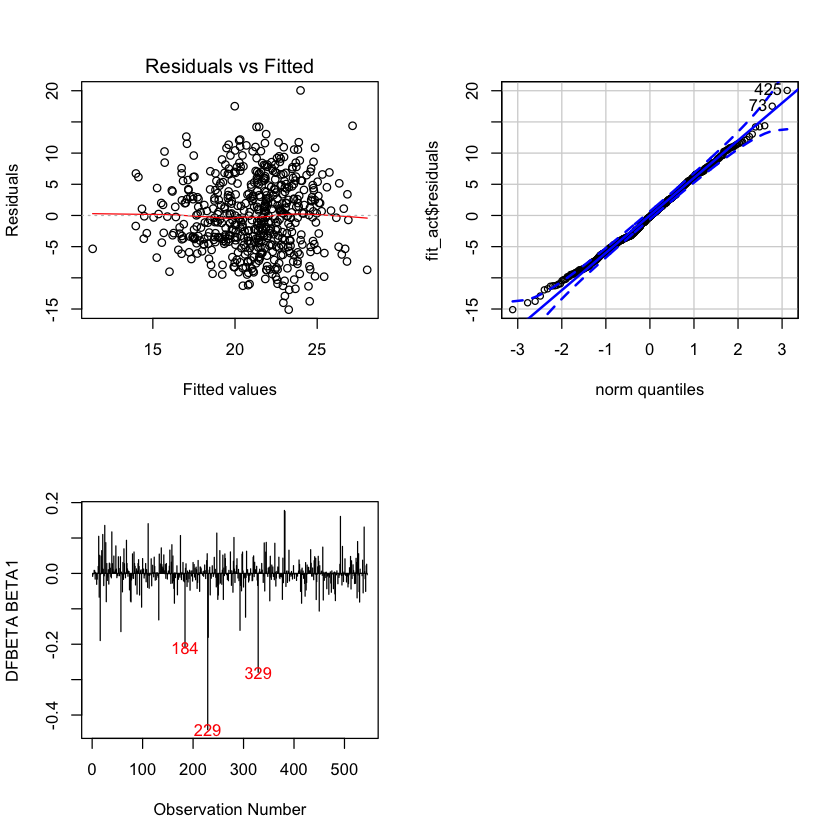

In [21]:
par(mfrow=c(2,2))
# residual scatterplot
plot(fit_act, 1, id.n = 0)
# normality check
library(car)
qqPlot(fit_act$residuals)

# DFBETAs
n = nrow(data)
dfbetas.vd = dfbetas(fit_act)
plot(dfbetas.vd[,2], type='h', xlab='Observation Number', ylab='DFBETA BETA1')
show.points = order(-abs(dfbetas.vd[,2]))[1:3]
text(seq(1,n)[show.points], dfbetas.vd[show.points,2], show.points, col='red')

In [22]:
fit_act_out = lm(alpha_pd[-show.points] ~ ratio_activation[-show.points] + Age_78[-show.points] + BMI[-show.points] +
                GIERACE[-show.points] + SITE[-show.points] + TUDRAMT[-show.points] + PASCORE[-show.points] + 
                M1ADEPR[-show.points] + M1ANTIB[-show.points] + OHSEAS[-show.points] + M1STATIN[-show.points] + Rstarch_total[-show.points])
summary(fit_act_out) # little change


Call:
lm(formula = alpha_pd[-show.points] ~ ratio_activation[-show.points] + 
    Age_78[-show.points] + BMI[-show.points] + GIERACE[-show.points] + 
    SITE[-show.points] + TUDRAMT[-show.points] + PASCORE[-show.points] + 
    M1ADEPR[-show.points] + M1ANTIB[-show.points] + OHSEAS[-show.points] + 
    M1STATIN[-show.points] + Rstarch_total[-show.points])

Residuals:
     Min       1Q   Median       3Q      Max 
-15.0588  -4.0415  -0.1681   4.0707  20.0184 

Coefficients:
                                                      Estimate Std. Error
(Intercept)                                          24.677560   2.299628
ratio_activation[-show.points]                        1.031927   0.285982
Age_78[-show.points]                                  0.111315   0.066849
BMI[-show.points]                                    -0.111585   0.070033
GIERACE[-show.points]2:AFRICAN AMERICAN              -2.052403   1.502043
GIERACE[-show.points]3:ASIAN                         -5.170302   1.357417
GIER

## Catabolism

In [23]:
fit_cat = lm(alpha_pd ~ ratio_catabolism + Age_78 + BMI + GIERACE + SITE + TUDRAMT + PASCORE + 
      M1ADEPR +  M1ANTIB + OHSEAS + M1STATIN + Rstarch_total)
summary(fit_cat)


Call:
lm(formula = alpha_pd ~ ratio_catabolism + Age_78 + BMI + GIERACE + 
    SITE + TUDRAMT + PASCORE + M1ADEPR + M1ANTIB + OHSEAS + M1STATIN + 
    Rstarch_total)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.5261  -4.1699  -0.1968   3.8359  21.1778 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                            23.647569   2.311604  10.230  < 2e-16
ratio_catabolism                        0.846870   0.276097   3.067 0.002273
Age_78                                  0.128575   0.067551   1.903 0.057545
BMI                                    -0.085669   0.070842  -1.209 0.227104
GIERACE2:AFRICAN AMERICAN               0.081564   1.439355   0.057 0.954832
GIERACE3:ASIAN                         -4.861283   1.363262  -3.566 0.000396
GIERACE4:HISPANIC                      -0.506416   1.828397  -0.277 0.781912
GIERACE5:OTHER                         -1.054615   2.046902  -0.515 0.606616
SITEBirmingham       

425  73 
382  62

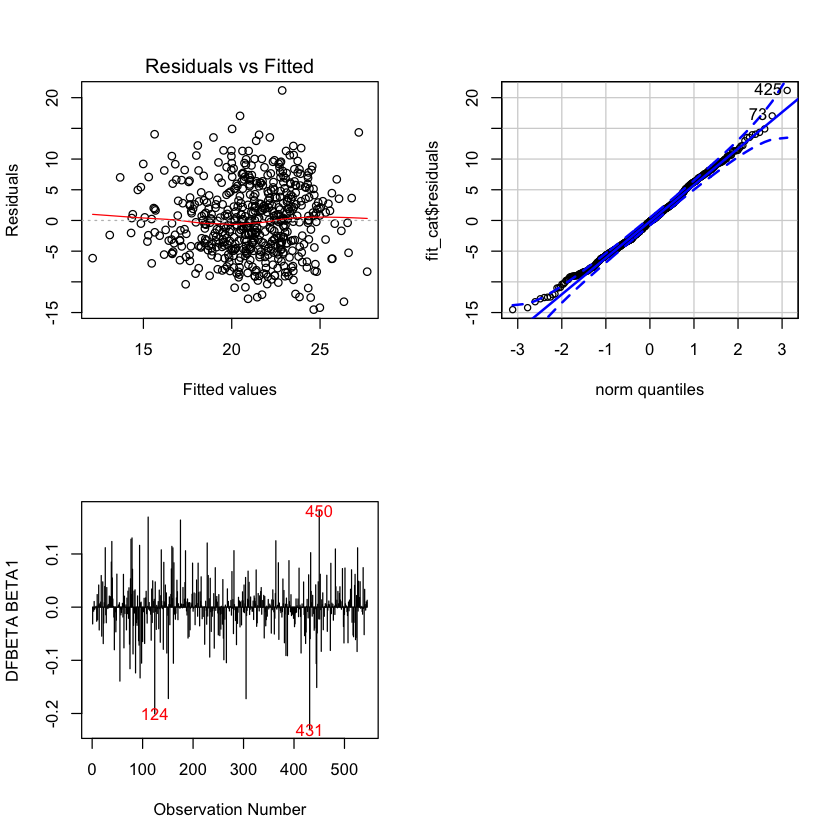

In [24]:
par(mfrow=c(2,2))
# residual scatterplot
plot(fit_cat, 1, id.n = 0)
# normality check
qqPlot(fit_cat$residuals)
# DFBETAs
n = nrow(data)
dfbetas.vd = dfbetas(fit_cat)
plot(dfbetas.vd[,2], type='h', xlab='Observation Number', ylab='DFBETA BETA1')
show.points = order(-abs(dfbetas.vd[,2]))[1:3]
text(seq(1,n)[show.points], dfbetas.vd[show.points,2], show.points, col='red')

In [25]:
fit_cat_out = lm(alpha_pd[-show.points] ~ ratio_catabolism[-show.points] + Age_78[-show.points] + BMI[-show.points] +
                GIERACE[-show.points] + SITE[-show.points] + TUDRAMT[-show.points] + PASCORE[-show.points] + 
                M1ADEPR[-show.points] + M1ANTIB[-show.points] + OHSEAS[-show.points] + M1STATIN[-show.points] + Rstarch_total[-show.points])
summary(fit_cat_out) # little change


Call:
lm(formula = alpha_pd[-show.points] ~ ratio_catabolism[-show.points] + 
    Age_78[-show.points] + BMI[-show.points] + GIERACE[-show.points] + 
    SITE[-show.points] + TUDRAMT[-show.points] + PASCORE[-show.points] + 
    M1ADEPR[-show.points] + M1ANTIB[-show.points] + OHSEAS[-show.points] + 
    M1STATIN[-show.points] + Rstarch_total[-show.points])

Residuals:
     Min       1Q   Median       3Q      Max 
-14.5303  -4.1808  -0.1892   3.8572  21.1950 

Coefficients:
                                                      Estimate Std. Error
(Intercept)                                          23.684183   2.326403
ratio_catabolism[-show.points]                        0.842205   0.276956
Age_78[-show.points]                                  0.129436   0.067872
BMI[-show.points]                                    -0.087631   0.071294
GIERACE[-show.points]2:AFRICAN AMERICAN               0.072771   1.443137
GIERACE[-show.points]3:ASIAN                         -4.846726   1.366905
GIER

### 25D3 ### (not significant)

In [26]:
fit_25 = lm(alpha_pd ~ OHVD3 + Age_78 + BMI + GIERACE + SITE + TUDRAMT + PASCORE + 
      M1ADEPR +  M1ANTIB + OHSEAS + M1STATIN + Rstarch_total)
summary(fit_25)


Call:
lm(formula = alpha_pd ~ OHVD3 + Age_78 + BMI + GIERACE + SITE + 
    TUDRAMT + PASCORE + M1ADEPR + M1ANTIB + OHSEAS + M1STATIN + 
    Rstarch_total)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.1409  -4.2427  -0.2159   4.1418  21.1289 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                            24.055443   2.342620  10.269  < 2e-16
OHVD3                                   0.050180   0.270849   0.185 0.853090
Age_78                                  0.102999   0.067665   1.522 0.128570
BMI                                    -0.111790   0.071256  -1.569 0.117296
GIERACE2:AFRICAN AMERICAN              -0.288143   1.464724  -0.197 0.844122
GIERACE3:ASIAN                         -4.956112   1.378993  -3.594 0.000357
GIERACE4:HISPANIC                      -0.673215   1.852535  -0.363 0.716453
GIERACE5:OTHER                         -1.199760   2.067318  -0.580 0.561934
SITEBirmingham                  

425  73 
382  62

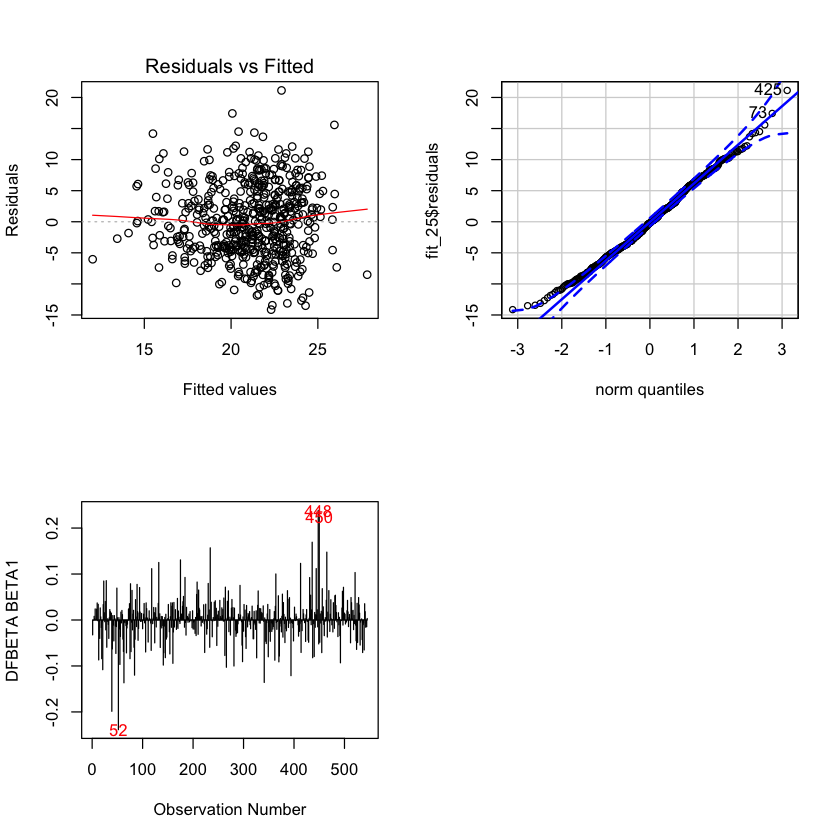

In [27]:
par(mfrow=c(2,2))
# residual s25terplot
plot(fit_25, 1, id.n = 0)
# normality check
qqPlot(fit_25$residuals)
# DFBETAs
n = nrow(data)
dfbetas.vd = dfbetas(fit_25)
plot(dfbetas.vd[,2], type='h', xlab='Observation Number', ylab='DFBETA BETA1')
show.points = order(-abs(dfbetas.vd[,2]))[1:3]
text(seq(1,n)[show.points], dfbetas.vd[show.points,2], show.points, col='red')

In [28]:
fit_25_out = lm(alpha_pd[-show.points] ~ OHVD3[-show.points] + Age_78[-show.points] + BMI[-show.points] +
                GIERACE[-show.points] + SITE[-show.points] + TUDRAMT[-show.points] + PASCORE[-show.points] + 
                M1ADEPR[-show.points] + M1ANTIB[-show.points] + OHSEAS[-show.points] + M1STATIN[-show.points] + Rstarch_total[-show.points])
summary(fit_25_out) # little change


Call:
lm(formula = alpha_pd[-show.points] ~ OHVD3[-show.points] + Age_78[-show.points] + 
    BMI[-show.points] + GIERACE[-show.points] + SITE[-show.points] + 
    TUDRAMT[-show.points] + PASCORE[-show.points] + M1ADEPR[-show.points] + 
    M1ANTIB[-show.points] + OHSEAS[-show.points] + M1STATIN[-show.points] + 
    Rstarch_total[-show.points])

Residuals:
     Min       1Q   Median       3Q      Max 
-14.1378  -4.2612  -0.2078   4.1830  21.1392 

Coefficients:
                                                      Estimate Std. Error
(Intercept)                                          24.100251   2.354981
OHVD3[-show.points]                                   0.047923   0.271428
Age_78[-show.points]                                  0.101276   0.067929
BMI[-show.points]                                    -0.112067   0.071533
GIERACE[-show.points]2:AFRICAN AMERICAN              -0.273659   1.467967
GIERACE[-show.points]3:ASIAN                         -4.955572   1.381641
GIERACE[-show.p

### 125D3 ###

In [29]:
fit_125 = lm(alpha_pd ~ OHV1D3 + Age_78 + BMI + GIERACE + SITE + TUDRAMT + PASCORE + 
      M1ADEPR +  M1ANTIB + OHSEAS + M1STATIN + Rstarch_total)
summary(fit_125)


Call:
lm(formula = alpha_pd ~ OHV1D3 + Age_78 + BMI + GIERACE + SITE + 
    TUDRAMT + PASCORE + M1ADEPR + M1ANTIB + OHSEAS + M1STATIN + 
    Rstarch_total)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.6251  -4.2062  -0.1576   3.8879  19.4789 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                            23.757628   2.271409  10.459  < 2e-16
OHV1D3                                  1.319683   0.267411   4.935 1.08e-06
Age_78                                  0.112793   0.065931   1.711 0.087708
BMI                                    -0.071897   0.069804  -1.030 0.303488
GIERACE2:AFRICAN AMERICAN              -0.629873   1.415492  -0.445 0.656512
GIERACE3:ASIAN                         -4.737178   1.349799  -3.510 0.000487
GIERACE4:HISPANIC                      -0.490234   1.808375  -0.271 0.786427
GIERACE5:OTHER                         -1.293906   2.022865  -0.640 0.522683
SITEBirmingham                 

425  73 
393  73

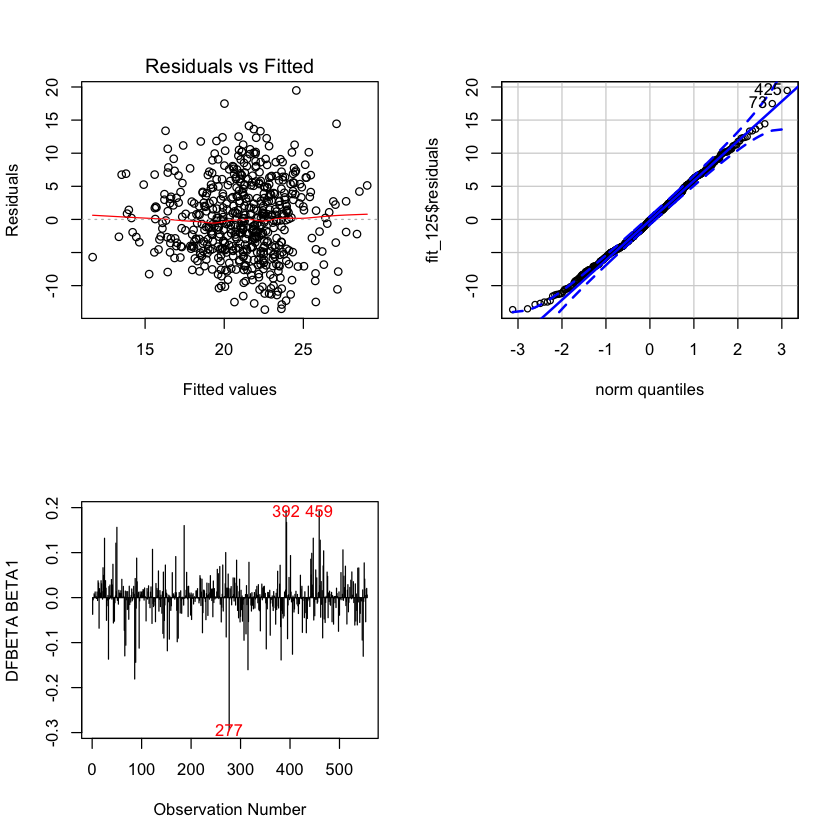

In [30]:
par(mfrow=c(2,2))
# residual scatterplot
plot(fit_125, 1, id.n = 0)
# normality check
qqPlot(fit_125$residuals)
# DFBETAs
n = nrow(data)
dfbetas.vd = dfbetas(fit_125)
plot(dfbetas.vd[,2], type='h', xlab='Observation Number', ylab='DFBETA BETA1')
show.points = order(-abs(dfbetas.vd[,2]))[1:3]
text(seq(1,n)[show.points], dfbetas.vd[show.points,2], show.points, col='red')

In [31]:
fit_125_out = lm(alpha_pd[-show.points] ~ OHV1D3[-show.points] + Age_78[-show.points] + BMI[-show.points] +
                GIERACE[-show.points] + SITE[-show.points] + TUDRAMT[-show.points] + PASCORE[-show.points] + 
                M1ADEPR[-show.points] + M1ANTIB[-show.points] + OHSEAS[-show.points] + M1STATIN[-show.points] + Rstarch_total[-show.points])
summary(fit_125_out) # little change


Call:
lm(formula = alpha_pd[-show.points] ~ OHV1D3[-show.points] + 
    Age_78[-show.points] + BMI[-show.points] + GIERACE[-show.points] + 
    SITE[-show.points] + TUDRAMT[-show.points] + PASCORE[-show.points] + 
    M1ADEPR[-show.points] + M1ANTIB[-show.points] + OHSEAS[-show.points] + 
    M1STATIN[-show.points] + Rstarch_total[-show.points])

Residuals:
     Min       1Q   Median       3Q      Max 
-13.6352  -4.2017  -0.1622   3.9119  19.3981 

Coefficients:
                                                      Estimate Std. Error
(Intercept)                                          23.752747   2.277555
OHV1D3[-show.points]                                  1.325514   0.268282
Age_78[-show.points]                                  0.111748   0.066077
BMI[-show.points]                                    -0.069643   0.070025
GIERACE[-show.points]2:AFRICAN AMERICAN              -0.481113   1.455249
GIERACE[-show.points]3:ASIAN                         -4.763414   1.353012
GIERACE[-show.

### 24D3 ###

In [32]:
fit_24 = lm(alpha_pd ~ OHV24D3 + Age_78 + BMI + GIERACE + SITE + TUDRAMT + PASCORE + 
      M1ADEPR +  M1ANTIB + OHSEAS + M1STATIN + Rstarch_total)
summary(fit_24)


Call:
lm(formula = alpha_pd ~ OHV24D3 + Age_78 + BMI + GIERACE + SITE + 
    TUDRAMT + PASCORE + M1ADEPR + M1ANTIB + OHSEAS + M1STATIN + 
    Rstarch_total)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.0586  -4.2383  -0.1927   4.0552  21.1008 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                            23.834063   2.322278  10.263  < 2e-16
OHV24D3                                 0.654770   0.272149   2.406 0.016474
Age_78                                  0.108915   0.067223   1.620 0.105784
BMI                                    -0.092712   0.071155  -1.303 0.193156
GIERACE2:AFRICAN AMERICAN               0.013203   1.449737   0.009 0.992737
GIERACE3:ASIAN                         -4.837760   1.374932  -3.519 0.000471
GIERACE4:HISPANIC                      -0.316671   1.845214  -0.172 0.863804
GIERACE5:OTHER                         -1.071706   2.060465  -0.520 0.603192
SITEBirmingham                

425  73 
393  73

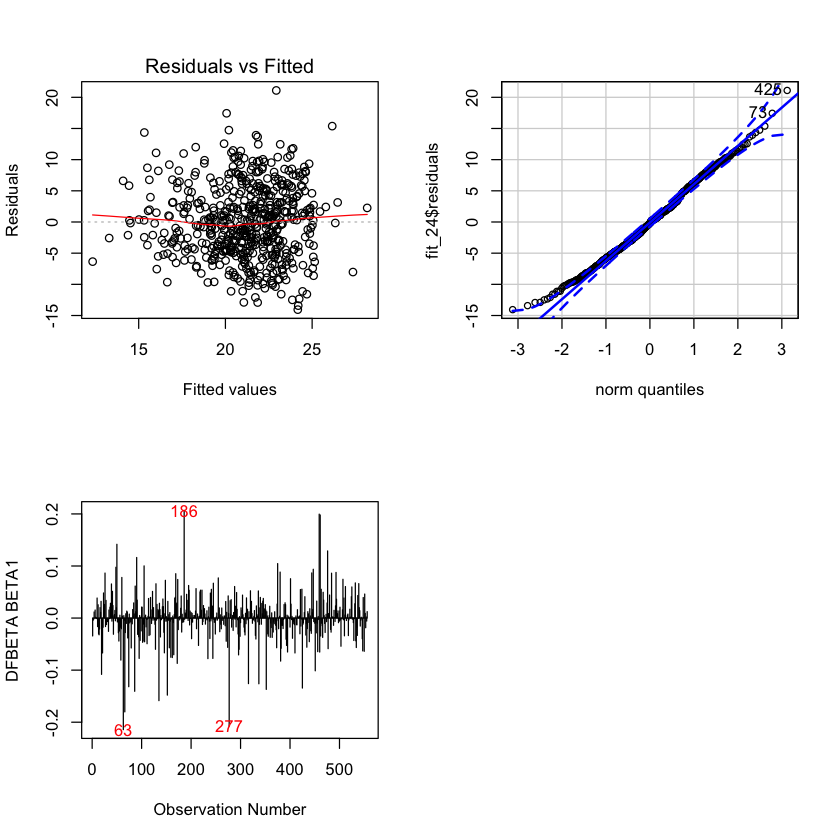

In [33]:
par(mfrow=c(2,2))
# residual scatterplot
plot(fit_24, 1, id.n = 0)
# normality check
qqPlot(fit_24$residuals)
# DFBETAs
n = nrow(data)
dfbetas.vd = dfbetas(fit_24)
plot(dfbetas.vd[,2], type='h', xlab='Observation Number', ylab='DFBETA BETA1')
show.points = order(-abs(dfbetas.vd[,2]))[1:3]
text(seq(1,n)[show.points], dfbetas.vd[show.points,2], show.points, col='red')

In [34]:
fit_24_out = lm(alpha_pd[-show.points] ~ OHV24D3[-show.points] + Age_78[-show.points] + BMI[-show.points] +
                GIERACE[-show.points] + SITE[-show.points] + TUDRAMT[-show.points] + PASCORE[-show.points] + 
                M1ADEPR[-show.points] + M1ANTIB[-show.points] + OHSEAS[-show.points] + M1STATIN[-show.points] + Rstarch_total[-show.points])
summary(fit_24_out) # little change


Call:
lm(formula = alpha_pd[-show.points] ~ OHV24D3[-show.points] + 
    Age_78[-show.points] + BMI[-show.points] + GIERACE[-show.points] + 
    SITE[-show.points] + TUDRAMT[-show.points] + PASCORE[-show.points] + 
    M1ADEPR[-show.points] + M1ANTIB[-show.points] + OHSEAS[-show.points] + 
    M1STATIN[-show.points] + Rstarch_total[-show.points])

Residuals:
     Min       1Q   Median       3Q      Max 
-14.3104  -4.2570  -0.1698   3.9922  21.0842 

Coefficients:
                                                      Estimate Std. Error
(Intercept)                                          23.972469   2.327779
OHV24D3[-show.points]                                 0.713199   0.275998
Age_78[-show.points]                                  0.107294   0.067544
BMI[-show.points]                                    -0.094822   0.071251
GIERACE[-show.points]2:AFRICAN AMERICAN               0.012499   1.451696
GIERACE[-show.points]3:ASIAN                         -4.806714   1.377240
GIERACE[-show

### Vitamin D status (not significant) ### 

In [35]:
fit_vd = lm(alpha_pd ~ VDstatus + Age_78 + BMI + GIERACE + SITE + TUDRAMT + PASCORE + 
      M1ADEPR +  M1ANTIB + OHSEAS + M1STATIN + Rstarch_total)
summary(fit_vd)


Call:
lm(formula = alpha_pd ~ VDstatus + Age_78 + BMI + GIERACE + SITE + 
    TUDRAMT + PASCORE + M1ADEPR + M1ANTIB + OHSEAS + M1STATIN + 
    Rstarch_total)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.7900  -4.3199  -0.2174   4.4051  20.9638 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                            24.211678   2.272978  10.652  < 2e-16
VDstatusdeficiency                     -0.572668   1.058578  -0.541 0.588739
VDstatusMissing:Not collected           1.736240   2.022625   0.858 0.391037
Age_78                                  0.100281   0.066041   1.518 0.129464
BMI                                    -0.113458   0.069565  -1.631 0.103468
GIERACE2:AFRICAN AMERICAN              -0.284395   1.349862  -0.211 0.833211
GIERACE3:ASIAN                         -4.580543   1.252676  -3.657 0.000280
GIERACE4:HISPANIC                      -0.610059   1.855810  -0.329 0.742484
GIERACE5:OTHER               

425  73 
413  73

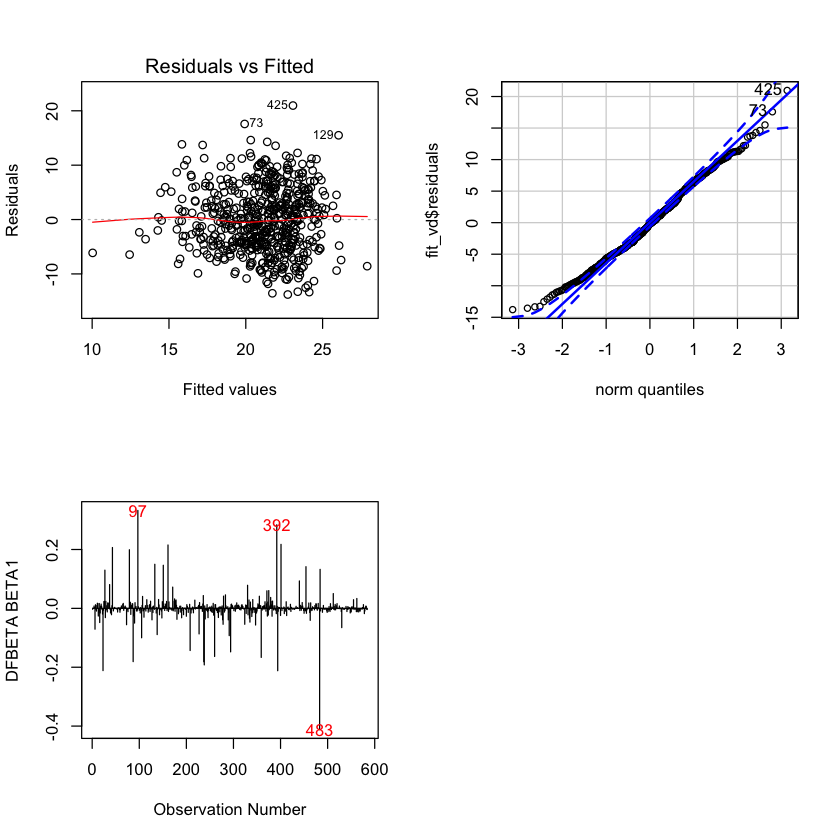

In [36]:
par(mfrow=c(2,2))
plot(fit_vd, 1)
qqPlot(fit_vd$residuals)
# DFBETAs
n = nrow(data)
dfbetas.vd = dfbetas(fit_vd)
plot(dfbetas.vd[,2], type='h', xlab='Observation Number', ylab='DFBETA BETA1')
show.points = order(-abs(dfbetas.vd[,2]))[1:3]
text(seq(1,n)[show.points], dfbetas.vd[show.points,2], show.points, col='red')

In [37]:
fit_vd_out = lm(alpha_pd[-show.points] ~ VDstatus[-show.points] + Age_78[-show.points] + BMI[-show.points] +
                GIERACE[-show.points] + SITE[-show.points] + TUDRAMT[-show.points] + PASCORE[-show.points] + 
                M1ADEPR[-show.points] + M1ANTIB[-show.points] + OHSEAS[-show.points] + M1STATIN[-show.points] + Rstarch_total[-show.points])
summary(fit_vd_out)


Call:
lm(formula = alpha_pd[-show.points] ~ VDstatus[-show.points] + 
    Age_78[-show.points] + BMI[-show.points] + GIERACE[-show.points] + 
    SITE[-show.points] + TUDRAMT[-show.points] + PASCORE[-show.points] + 
    M1ADEPR[-show.points] + M1ANTIB[-show.points] + OHSEAS[-show.points] + 
    M1STATIN[-show.points] + Rstarch_total[-show.points])

Residuals:
     Min       1Q   Median       3Q      Max 
-13.6028  -4.3490  -0.1969   4.4731  20.9400 

Coefficients:
                                                      Estimate Std. Error
(Intercept)                                          24.168766   2.288007
VDstatus[-show.points]deficiency                     -0.590283   1.061021
VDstatus[-show.points]Missing:Not collected           1.717727   2.023810
Age_78[-show.points]                                  0.098793   0.066082
BMI[-show.points]                                    -0.108864   0.069791
GIERACE[-show.points]2:AFRICAN AMERICAN              -0.143402   1.382179
GIERACE[-sho

### Visualization ###

In [46]:
pdf('../figures/MLR_act.pdf')
ratio_act.sort = sort(data$ratio_activation)
plot(ratio_activation, alpha_pd, col='red', xlab='Standardized Ratio_activation', ylab='PD Alpha Diversity', 
     cex.lab=1.5, cex.axis=1.2, font.lab=2, font.axis=2)
pred_act = predict(fit_act, newdata=data.frame(ratio_activation=ratio_act.sort, Age_78=mean(data$Age_78), BMI=mean(data$BMI),
                                          GIERACE='1:WHITE', SITE='San Diego', TUDRAMT = '0:None drinker',
                                          PASCORE = mean(data$PASCORE), M1ADEPR='0: No', M1ANTIB='0: No', 
                                          OHSEAS='3:SUMMER', M1STATIN='1: Yes',
                                          Rstarch_total=mean(data$Rstarch_total, na.rm=T)), type='response', se.fit=T)
lines(ratio_act.sort, pred_act$fit, col='red', lwd=3)
lines(ratio_act.sort, pred_act$fit - 1.96*pred_act$se.fit, col='red', lty=2, lwd=2)
lines(ratio_act.sort, pred_act$fit + 1.96*pred_act$se.fit, col='red', lty=2, lwd=2)
dev.off()

pdf 
  2

In [47]:
pdf('../figures/MLR_cat.pdf')
ratio_cat.sort = sort(data$ratio_catabolism)
plot(ratio_catabolism, alpha_pd, col='purple', xlab='Standardized Ratio_Catabolism', ylab='PD Alpha Diversity',
    cex.lab=1.5, cex.axis=1.2, font.lab=2, font.axis=2)
pred_cat = predict(fit_cat, newdata=data.frame(ratio_catabolism=ratio_cat.sort, Age_78=mean(data$Age_78), BMI=mean(data$BMI),
                                          GIERACE='1:WHITE', SITE='San Diego', TUDRAMT = '0:None drinker',
                                          PASCORE = mean(data$PASCORE), M1ADEPR='0: No', M1ANTIB='0: No', 
                                          OHSEAS='3:SUMMER', M1STATIN='1: Yes',
                                          Rstarch_total=mean(data$Rstarch_total, na.rm=T)), type='response', se.fit=T)
lines(ratio_cat.sort, pred_cat$fit, col='purple', lwd=3)
lines(ratio_cat.sort, pred_cat$fit - 1.96*pred_cat$se.fit, col='purple', lty=2, lwd=2)
lines(ratio_cat.sort, pred_cat$fit + 1.96*pred_cat$se.fit, col='purple', lty=2, lwd=2)
dev.off()

pdf 
  2

In [48]:
pdf('../figures/MLR_125.pdf')
V1D3.sort = sort(data$OHV1D3)
plot(OHV1D3, alpha_pd, col='darkgreen', xlab='Standardized 1,25-(OH)2D', ylab='PD Alpha Diversity',
    cex.lab=1.5, cex.axis=1.2, font.lab=2, font.axis=2)
pred_125 = predict(fit_125, newdata=data.frame(OHV1D3=V1D3.sort, Age_78=mean(data$Age_78), BMI=mean(data$BMI),
                                          GIERACE='1:WHITE', SITE='San Diego', TUDRAMT = '0:None drinker',
                                          PASCORE = mean(data$PASCORE), M1ADEPR='0: No', M1ANTIB='0: No', 
                                          OHSEAS='3:SUMMER', M1STATIN='1: Yes',
                                          Rstarch_total=mean(data$Rstarch_total, na.rm=T)), type='response', se.fit=T)
lines(V1D3.sort, pred_125$fit, col='green', lwd=3)
lines(V1D3.sort, pred_125$fit - 1.96*pred_125$se.fit, col='green', lty=2, lwd=2)
lines(V1D3.sort, pred_125$fit + 1.96*pred_125$se.fit, col='green', lty=2, lwd=2)
dev.off()

pdf 
  2

In [49]:
pdf('../figures/MLR_24.pdf')
V24D3.sort = sort(data$OHV24D3)
plot(OHV24D3, alpha_pd, col='darkorange', xlab='Standardized 24,25(OH)2D', ylab='PD Alpha Diversity',
    cex.lab=1.5, cex.axis=1.2, font.lab=2, font.axis=2)
pred_24 = predict(fit_24, newdata=data.frame(OHV24D3=V24D3.sort, Age_78=mean(data$Age_78), BMI=mean(data$BMI),
                                          GIERACE='1:WHITE', SITE='San Diego', TUDRAMT = '0:None drinker',
                                          PASCORE = mean(data$PASCORE), M1ADEPR='0: No', M1ANTIB='0: No', 
                                          OHSEAS='3:SUMMER', M1STATIN='1: Yes',
                                          Rstarch_total=mean(data$Rstarch_total, na.rm=T)), type='response', se.fit=T)
lines(V24D3.sort, pred_24$fit, col='orange', lwd=3)
lines(V24D3.sort, pred_24$fit - 1.96*pred_24$se.fit, col='orange', lty=2, lwd=2)
lines(V24D3.sort, pred_24$fit + 1.96*pred_24$se.fit, col='orange', lty=2, lwd=2)
dev.off()

pdf 
  2

In [50]:
pdf('../figures/MLR_25.pdf')
V25D3.sort = sort(data$OHVD3)
plot(OHVD3, alpha_pd, col='darkblue', xlab='Standardized 25(OH)D', ylab='PD Alpha Diversity',
    cex.lab=1.5, cex.axis=1.2, font.lab=2, font.axis=2)
pred_25 = predict(fit_25, newdata=data.frame(OHVD3=V25D3.sort, Age_78=mean(data$Age_78), BMI=mean(data$BMI),
                                          GIERACE='1:WHITE', SITE='San Diego', TUDRAMT = '0:None drinker',
                                          PASCORE = mean(data$PASCORE), M1ADEPR='0: No', M1ANTIB='0: No', 
                                          OHSEAS='3:SUMMER', M1STATIN='1: Yes',
                                          Rstarch_total=mean(data$Rstarch_total, na.rm=T)), type='response', se.fit=T)
lines(V25D3.sort, pred_25$fit, col='blue', lwd=3)
lines(V25D3.sort, pred_25$fit - 1.96*pred_25$se.fit, col='blue', lty=2, lwd=2)
lines(V25D3.sort, pred_25$fit + 1.96*pred_25$se.fit, col='blue', lty=2, lwd=2)
dev.off()

pdf 
  2

## sensitivity analysis on antibiotics

In [95]:
summary(data$M1ANTIB)

0: No 1: Yes 
   558     41

In [99]:
fit_125_noAnti = lm(alpha_pd ~ OHV1D3 + Age_78 + BMI + GIERACE + SITE + TUDRAMT + PASCORE + 
      M1ADEPR + OHSEAS + M1STATIN + Rstarch_total, data=data[data$M1ANTIB%in%'0: No', ])
summary(fit_125_noAnti)


Call:
lm(formula = alpha_pd ~ OHV1D3 + Age_78 + BMI + GIERACE + SITE + 
    TUDRAMT + PASCORE + M1ADEPR + OHSEAS + M1STATIN + Rstarch_total, 
    data = data[data$M1ANTIB %in% "0: No", ])

Residuals:
     Min       1Q   Median       3Q      Max 
-14.1130  -4.2538  -0.0922   3.8667  19.0703 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                            25.411879   2.390841  10.629  < 2e-16
OHV1D3                                  1.333980   0.274924   4.852 1.64e-06
Age_78                                  0.087315   0.068972   1.266 0.206129
BMI                                    -0.117441   0.073747  -1.592 0.111917
GIERACE2:AFRICAN AMERICAN              -1.321801   1.504716  -0.878 0.380134
GIERACE3:ASIAN                         -5.130578   1.420682  -3.611 0.000336
GIERACE4:HISPANIC                      -2.029966   1.993203  -1.018 0.308967
GIERACE5:OTHER                         -1.332937   2.041559  -0.653 0.514125

In [104]:
summary(data[data$M1ANTIB%in%'1: Yes', c('GIERACE', 'TUDRAMT', 'OHSEAS')])

               GIERACE                              TUDRAMT  
 1:WHITE           :33   0:None drinker                 :14  
 2:AFRICAN AMERICAN: 2   .                              : 0  
 3:ASIAN           : 4   1: Less than one drink per week:10  
 4:HISPANIC        : 2   2: 1-2drinks per week          : 3  
 5:OTHER           : 0   3: 3-5 drinks per week         : 6  
                         4: 6-13 drinks per week        : 8  
                         5: 14 or more drinks per week  : 0  
                    OHSEAS  
 3:SUMMER              :14  
 1:WINTER              : 0  
 2:SPRING              :17  
 4:FALL                : 7  
 Missing:Not collected : 3  
                            
                            

In [100]:
fit_125_Anti = lm(alpha_pd ~ OHV1D3 + Age_78 + BMI + GIERACE + SITE + TUDRAMT + PASCORE + 
      M1ADEPR + OHSEAS + M1STATIN + Rstarch_total, data=data[data$M1ANTIB%in%'1: Yes', ])
summary(fit_125_Anti)


Call:
lm(formula = alpha_pd ~ OHV1D3 + Age_78 + BMI + GIERACE + SITE + 
    TUDRAMT + PASCORE + M1ADEPR + OHSEAS + M1STATIN + Rstarch_total, 
    data = data[data$M1ANTIB %in% "1: Yes", ])

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8447 -1.7224 -0.0895  1.8046  6.3238 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)   
(Intercept)                             8.50917    9.96998   0.853  0.40599   
OHV1D3                                  1.43365    1.30002   1.103  0.28643   
Age_78                                  0.17783    0.24708   0.720  0.48207   
BMI                                     0.05137    0.28255   0.182  0.85803   
GIERACE2:AFRICAN AMERICAN              14.56355    4.18288   3.482  0.00308 **
GIERACE3:ASIAN                         -0.72187    4.16449  -0.173  0.86456   
GIERACE4:HISPANIC                      10.63182    5.33675   1.992  0.06370 . 
SITEBirmingham                          0.45849    2.96356   0.155  0

In [105]:
fit_25_noAnti = lm(alpha_pd ~ OHVD3 + Age_78 + BMI + GIERACE + SITE + TUDRAMT + PASCORE + 
      M1ADEPR + OHSEAS + M1STATIN + Rstarch_total, data=data[data$M1ANTIB%in%'0: No', ])
summary(fit_25_noAnti)

fit_25_Anti = lm(alpha_pd ~ OHVD3 + Age_78 + BMI + GIERACE + SITE + TUDRAMT + PASCORE + 
      M1ADEPR + OHSEAS + M1STATIN + Rstarch_total, data=data[data$M1ANTIB%in%'1: Yes', ])
summary(fit_25_Anti)


Call:
lm(formula = alpha_pd ~ OHVD3 + Age_78 + BMI + GIERACE + SITE + 
    TUDRAMT + PASCORE + M1ADEPR + OHSEAS + M1STATIN + Rstarch_total, 
    data = data[data$M1ANTIB %in% "0: No", ])

Residuals:
     Min       1Q   Median       3Q      Max 
-14.5083  -4.3248  -0.1621   4.3422  20.7579 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                            25.651742   2.465872  10.403  < 2e-16
OHVD3                                   0.099918   0.279472   0.358 0.720856
Age_78                                  0.082644   0.070946   1.165 0.244646
BMI                                    -0.156378   0.075362  -2.075 0.038515
GIERACE2:AFRICAN AMERICAN              -0.865740   1.553023  -0.557 0.577476
GIERACE3:ASIAN                         -5.226641   1.453769  -3.595 0.000358
GIERACE4:HISPANIC                      -2.159074   2.043155  -1.057 0.291163
GIERACE5:OTHER                         -1.183525   2.088820  -0.567 0.571251



Call:
lm(formula = alpha_pd ~ OHVD3 + Age_78 + BMI + GIERACE + SITE + 
    TUDRAMT + PASCORE + M1ADEPR + OHSEAS + M1STATIN + Rstarch_total, 
    data = data[data$M1ANTIB %in% "1: Yes", ])

Residuals:
   Min     1Q Median     3Q    Max 
-6.299 -1.941 -0.166  1.553  6.102 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)                            10.66480   10.30363   1.035 0.316036    
OHVD3                                  -0.52961    1.16250  -0.456 0.654813    
Age_78                                  0.19942    0.26758   0.745 0.466917    
BMI                                    -0.07060    0.28071  -0.252 0.804628    
GIERACE2:AFRICAN AMERICAN              13.14758    4.93682   2.663 0.017006 *  
GIERACE3:ASIAN                         -3.32948    3.69454  -0.901 0.380853    
GIERACE4:HISPANIC                       9.34167    5.67065   1.647 0.118977    
SITEBirmingham                          0.81369    3.03360   0.268 0.791

In [106]:
fit_24_noAnti = lm(alpha_pd ~ OHV24D3 + Age_78 + BMI + GIERACE + SITE + TUDRAMT + PASCORE + 
      M1ADEPR + OHSEAS + M1STATIN + Rstarch_total, data=data[data$M1ANTIB%in%'0: No', ])
summary(fit_24_noAnti)

fit_24_Anti = lm(alpha_pd ~ OHV24D3 + Age_78 + BMI + GIERACE + SITE + TUDRAMT + PASCORE + 
      M1ADEPR + OHSEAS + M1STATIN + Rstarch_total, data=data[data$M1ANTIB%in%'1: Yes', ])
summary(fit_24_Anti)


Call:
lm(formula = alpha_pd ~ OHV24D3 + Age_78 + BMI + GIERACE + SITE + 
    TUDRAMT + PASCORE + M1ADEPR + OHSEAS + M1STATIN + Rstarch_total, 
    data = data[data$M1ANTIB %in% "0: No", ])

Residuals:
     Min       1Q   Median       3Q      Max 
-14.1594  -4.4026  -0.1332   3.9533  20.7141 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                            25.444102   2.445168  10.406  < 2e-16
OHV24D3                                 0.676851   0.278424   2.431 0.015413
Age_78                                  0.087068   0.070358   1.238 0.216491
BMI                                    -0.137623   0.075180  -1.831 0.067767
GIERACE2:AFRICAN AMERICAN              -0.607108   1.538747  -0.395 0.693348
GIERACE3:ASIAN                         -5.148152   1.447899  -3.556 0.000414
GIERACE4:HISPANIC                      -1.770826   2.034606  -0.870 0.384532
GIERACE5:OTHER                         -1.078863   2.080424  -0.519 0.60428


Call:
lm(formula = alpha_pd ~ OHV24D3 + Age_78 + BMI + GIERACE + SITE + 
    TUDRAMT + PASCORE + M1ADEPR + OHSEAS + M1STATIN + Rstarch_total, 
    data = data[data$M1ANTIB %in% "1: Yes", ])

Residuals:
    Min      1Q  Median      3Q     Max 
-6.0533 -1.5708 -0.5865  1.3874  7.0670 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)                            10.44010   10.11448   1.032 0.317333    
OHV24D3                                 1.03024    1.44114   0.715 0.484985    
Age_78                                  0.14841    0.25248   0.588 0.564870    
BMI                                    -0.02348    0.27565  -0.085 0.933188    
GIERACE2:AFRICAN AMERICAN              15.60576    4.66355   3.346 0.004099 ** 
GIERACE3:ASIAN                         -2.46501    3.74192  -0.659 0.519421    
GIERACE4:HISPANIC                      11.06501    5.61319   1.971 0.066245 .  
SITEBirmingham                          1.23355    3.02193  

In [107]:
fit_act_noAnti = lm(alpha_pd ~ ratio_activation + Age_78 + BMI + GIERACE + SITE + TUDRAMT + PASCORE + 
      M1ADEPR + OHSEAS + M1STATIN + Rstarch_total, data=data[data$M1ANTIB%in%'0: No', ])
summary(fit_act_noAnti)

fit_act_Anti = lm(alpha_pd ~ ratio_activation + Age_78 + BMI + GIERACE + SITE + TUDRAMT + PASCORE + 
      M1ADEPR + OHSEAS + M1STATIN + Rstarch_total, data=data[data$M1ANTIB%in%'1: Yes', ])
summary(fit_act_Anti)


Call:
lm(formula = alpha_pd ~ ratio_activation + Age_78 + BMI + GIERACE + 
    SITE + TUDRAMT + PASCORE + M1ADEPR + OHSEAS + M1STATIN + 
    Rstarch_total, data = data[data$M1ANTIB %in% "0: No", ])

Residuals:
     Min       1Q   Median       3Q      Max 
-15.5131  -4.3289  -0.2187   4.0254  19.7624 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                            26.013547   2.428481  10.712  < 2e-16
ratio_activation                        0.958985   0.299140   3.206 0.001436
Age_78                                  0.092144   0.070227   1.312 0.190112
BMI                                    -0.149793   0.074338  -2.015 0.044457
GIERACE2:AFRICAN AMERICAN              -2.451985   1.592779  -1.539 0.124355
GIERACE3:ASIAN                         -5.383105   1.434925  -3.751 0.000197
GIERACE4:HISPANIC                      -2.652794   2.017370  -1.315 0.189144
GIERACE5:OTHER                         -1.524034   2.066384  -0.73


Call:
lm(formula = alpha_pd ~ ratio_activation + Age_78 + BMI + GIERACE + 
    SITE + TUDRAMT + PASCORE + M1ADEPR + OHSEAS + M1STATIN + 
    Rstarch_total, data = data[data$M1ANTIB %in% "1: Yes", ])

Residuals:
    Min      1Q  Median      3Q     Max 
-6.1695 -1.8530 -0.0756  2.0026  6.0150 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)                             8.74087    9.66865   0.904 0.379383    
ratio_activation                        1.50948    1.03587   1.457 0.164404    
Age_78                                  0.27667    0.25307   1.093 0.290464    
BMI                                     0.04368    0.26853   0.163 0.872823    
GIERACE2:AFRICAN AMERICAN               9.31320    5.29426   1.759 0.097664 .  
GIERACE3:ASIAN                         -1.66436    3.60490  -0.462 0.650515    
GIERACE4:HISPANIC                       7.94665    5.36582   1.481 0.158037    
SITEBirmingham                         -0.58157    

In [108]:
fit_cat_noAnti = lm(alpha_pd ~ ratio_catabolism + Age_78 + BMI + GIERACE + SITE + TUDRAMT + PASCORE + 
      M1ADEPR + OHSEAS + M1STATIN + Rstarch_total, data=data[data$M1ANTIB%in%'0: No', ])
summary(fit_cat_noAnti)

fit_cat_Anti = lm(alpha_pd ~ ratio_catabolism + Age_78 + BMI + GIERACE + SITE + TUDRAMT + PASCORE + 
      M1ADEPR + OHSEAS + M1STATIN + Rstarch_total, data=data[data$M1ANTIB%in%'1: Yes', ])
summary(fit_cat_Anti)


Call:
lm(formula = alpha_pd ~ ratio_catabolism + Age_78 + BMI + GIERACE + 
    SITE + TUDRAMT + PASCORE + M1ADEPR + OHSEAS + M1STATIN + 
    Rstarch_total, data = data[data$M1ANTIB %in% "0: No", ])

Residuals:
     Min       1Q   Median       3Q      Max 
-14.6507  -4.2452  -0.1736   3.6822  20.8037 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                            25.238515   2.434696  10.366  < 2e-16
ratio_catabolism                        0.873846   0.284671   3.070 0.002264
Age_78                                  0.104912   0.070620   1.486 0.138047
BMI                                    -0.129797   0.074946  -1.732 0.083938
GIERACE2:AFRICAN AMERICAN              -0.551826   1.528363  -0.361 0.718215
GIERACE3:ASIAN                         -5.196319   1.435893  -3.619 0.000327
GIERACE4:HISPANIC                      -1.990339   2.016242  -0.987 0.324064
GIERACE5:OTHER                         -1.055619   2.066764  -0.51


Call:
lm(formula = alpha_pd ~ ratio_catabolism + Age_78 + BMI + GIERACE + 
    SITE + TUDRAMT + PASCORE + M1ADEPR + OHSEAS + M1STATIN + 
    Rstarch_total, data = data[data$M1ANTIB %in% "1: Yes", ])

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6439 -1.6736 -0.6986  1.2900  6.2451 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)   
(Intercept)                            13.43055   10.35634   1.297  0.21308   
ratio_catabolism                        1.41915    1.27388   1.114  0.28172   
Age_78                                  0.23247    0.25459   0.913  0.37473   
BMI                                    -0.06990    0.26847  -0.260  0.79791   
GIERACE2:AFRICAN AMERICAN              15.37099    4.28964   3.583  0.00249 **
GIERACE3:ASIAN                         -2.26443    3.63341  -0.623  0.54192   
GIERACE4:HISPANIC                      10.96982    5.37200   2.042  0.05799 . 
SITEBirmingham                          1.34179    2.95177 

## sensitivity analysis on Race

In [109]:
table(data$GIERACE)


           1:WHITE 2:AFRICAN AMERICAN            3:ASIAN         4:HISPANIC 
               520                 24                 34                 12 
           5:OTHER 
                 9 

In [110]:
table(data[data$GIERACE %in%'1:WHITE', ]$GIERACE)


           1:WHITE 2:AFRICAN AMERICAN            3:ASIAN         4:HISPANIC 
               520                  0                  0                  0 
           5:OTHER 
                 0 

In [112]:
'%ni%' <- Negate('%in%')
table(data[data$GIERACE %ni%'1:WHITE', ]$GIERACE)


           1:WHITE 2:AFRICAN AMERICAN            3:ASIAN         4:HISPANIC 
                 0                 24                 34                 12 
           5:OTHER 
                 9 

In [113]:
fit_25_White = lm(alpha_pd ~ OHVD3 + Age_78 + BMI  + SITE + TUDRAMT + PASCORE + 
      M1ADEPR + M1ANTIB + OHSEAS + M1STATIN + Rstarch_total, data=data[data$GIERACE %in%'1:WHITE', ])
summary(fit_25_White)

'%ni%' <- Negate('%in%')
fit_25_nonWhite = lm(alpha_pd ~ OHVD3 + Age_78 + BMI  + SITE + TUDRAMT + PASCORE + 
      M1ADEPR + M1ANTIB + OHSEAS + M1STATIN + Rstarch_total, data=data[data$GIERACE %ni%'1:WHITE', ])
summary(fit_25_nonWhite)



Call:
lm(formula = alpha_pd ~ OHVD3 + Age_78 + BMI + SITE + TUDRAMT + 
    PASCORE + M1ADEPR + M1ANTIB + OHSEAS + M1STATIN + Rstarch_total, 
    data = data[data$GIERACE %in% "1:WHITE", ])

Residuals:
    Min      1Q  Median      3Q     Max 
-14.379  -4.353  -0.006   4.312  21.215 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                            23.304143   2.516574   9.260  < 2e-16
OHVD3                                   0.153859   0.280003   0.549 0.582937
Age_78                                  0.115451   0.071238   1.621 0.105782
BMI                                    -0.097335   0.076775  -1.268 0.205517
SITEBirmingham                          0.031021   1.038246   0.030 0.976177
SITEMinneapolis                         1.586223   0.927636   1.710 0.087948
SITEPalo Alto                          -0.631717   1.087588  -0.581 0.561632
SITEPittsburgh                         -1.461106   0.920132  -1.588 0.112991
SITEPort


Call:
lm(formula = alpha_pd ~ OHVD3 + Age_78 + BMI + SITE + TUDRAMT + 
    PASCORE + M1ADEPR + M1ANTIB + OHSEAS + M1STATIN + Rstarch_total, 
    data = data[data$GIERACE %ni% "1:WHITE", ])

Residuals:
    Min      1Q  Median      3Q     Max 
-10.710  -3.684  -1.031   3.686  13.115 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)   
(Intercept)                            20.352810   6.832823   2.979  0.00479 **
OHVD3                                  -0.983150   1.444082  -0.681  0.49973   
Age_78                                 -0.039208   0.241906  -0.162  0.87202   
BMI                                    -0.091545   0.214112  -0.428  0.67116   
SITEBirmingham                          1.670879   3.828925   0.436  0.66479   
SITEMinneapolis                         3.292662   4.407699   0.747  0.45921   
SITEPalo Alto                          -1.203170   2.750894  -0.437  0.66408   
SITEPittsburgh                          0.195300   6.102565  